In [14]:
import numpy as np
import matplotlib.pyplot as plt
import obspy
from datetime import timedelta
from obspy.taup import TauPyModel
from os.path import join
from glob import glob
from IPython.display import display
model = TauPyModel(model="ak135")
%matplotlib inline

In [160]:
def plot_single(station="ANQ",dir1="/Users/ziyixi/data/20190211/data/processed/201102101439302",dir2="/Users/ziyixi/data/20190211/bg/OUTPUT_FILES"):
    key1=set()
    key2=set()
    
    dir1_read_z=join(dir1,"SD."+station+"*Z")
    dir1_read_r=join(dir1,"SD."+station+"*R")
    dir1_read_t=join(dir1,"SD."+station+"*T")
    
    dir2_read_z=join(dir2,"SD."+station+".MXZ.sem.sac")
    dir2_read_r=join(dir2,"SD."+station+".MXR.sem.sac")
    dir2_read_t=join(dir2,"SD."+station+".MXT.sem.sac")
    
    z1=obspy.read(dir1_read_z)[0]
    r1=obspy.read(dir1_read_r)[0]
    t1=obspy.read(dir1_read_t)[0]
    
    z2=obspy.read(dir2_read_z)[0]
    r2=obspy.read(dir2_read_r)[0]
    t2=obspy.read(dir2_read_t)[0]
#     print(z1.stats,z2.stats)
    
    z1.filter("bandpass",freqmin=1/50,freqmax=1/10)
    r1.filter("bandpass",freqmin=1/50,freqmax=1/10)
    t1.filter("bandpass",freqmin=1/50,freqmax=1/10)
    z2.filter("bandpass",freqmin=1/50,freqmax=1/10)
    r2.filter("bandpass",freqmin=1/50,freqmax=1/10)
    t2.filter("bandpass",freqmin=1/50,freqmax=1/10)
    
#     z1=z1.slice(z1.stats.starttime+timedelta(seconds=float(z1.stats.sac.o)),z1.stats.endtime)
#     r1=r1.slice(r1.stats.starttime+timedelta(seconds=float(r1.stats.sac.o)),r1.stats.endtime)
#     t1=t1.slice(t1.stats.starttime+timedelta(seconds=float(t1.stats.sac.o)),t1.stats.endtime)
#     z2=z2.slice(z2.stats.starttime+timedelta(seconds=float(z2.stats.sac.o)),z2.stats.endtime)
#     r2=r2.slice(r2.stats.starttime+timedelta(seconds=float(r2.stats.sac.o)),r2.stats.endtime)
#     t2=t2.slice(t2.stats.starttime+timedelta(seconds=float(t2.stats.sac.o)),t2.stats.endtime)
    
    plot_arrivals={
            "first_p":None,
            "first_s":None,
            "pP":None,
            "PcP":None
    }    
    
    arrivals = model.get_travel_times(source_depth_in_km=z1.stats.sac.evdp,distance_in_degree=z1.stats.sac.gcarc)
    for arrival in arrivals:
        if((arrival.name=='p') or (arrival.name=="P")):
            plot_arrivals["first_p"]=arrival.time
            break

    for arrival in arrivals:
        if((arrival.name=='s') or (arrival.name=="S")):
            plot_arrivals["first_s"]=arrival.time
            break

    for arrival in arrivals:
        if((arrival.name=='pP')):
            plot_arrivals["pP"]=arrival.time
            break

    for arrival in arrivals:
        if((arrival.name=='PcP')):
            plot_arrivals["PcP"]=arrival.time
            break
    
    reftime1=z1.stats.starttime+timedelta(seconds=float(z1.stats.sac.o+z1.stats.sac.b))
    reftime2=z2.stats.starttime+timedelta(seconds=float(z2.stats.sac.o+z2.stats.sac.b))
#     print(reftime1,reftime2)
    
    T=300
    A=50
    z1=z1.slice(reftime1+timedelta(seconds=plot_arrivals["first_p"]-A),reftime1+timedelta(seconds=plot_arrivals["first_p"]+T))
    r1=r1.slice(reftime1+timedelta(seconds=plot_arrivals["first_p"]-A),reftime1+timedelta(seconds=plot_arrivals["first_p"]+T))
    t1=t1.slice(reftime1+timedelta(seconds=plot_arrivals["first_p"]-A),reftime1+timedelta(seconds=plot_arrivals["first_p"]+T))
    z2=z2.slice(reftime2+timedelta(seconds=plot_arrivals["first_p"]-A),reftime2+timedelta(seconds=plot_arrivals["first_p"]+T))
    r2=r2.slice(reftime2+timedelta(seconds=plot_arrivals["first_p"]-A),reftime2+timedelta(seconds=plot_arrivals["first_p"]+T))
    t2=t2.slice(reftime2+timedelta(seconds=plot_arrivals["first_p"]-A),reftime2+timedelta(seconds=plot_arrivals["first_p"]+T))
  
#     all=obspy.Stream()
#     all+=z1
#     all+=z2
#     all+=r1
#     all+=r2
#     all+=t1
#     all+=t2    
#     all.normalize(global_max=True)
    
#     z1.normalize()
#     r1.normalize()
#     t1.normalize()
#     z2.normalize()
#     r2.normalize()
#     t2.normalize()
    
    plt.figure(figsize=(24,16))
    plot_x_1=np.linspace(-A,T,z1.stats.npts)
    plot_x_2=np.linspace(-A,T,z2.stats.npts)
    
    axz=plt.subplot(311)
    plot_y_1=z1.data
    plot_y_2=z2.data*z2.stats.sac.scale
    axz.plot(plot_x_1,plot_y_1,"k")
    axz.plot(plot_x_2,plot_y_2,"r")
    axz.scatter(0,0,color="r",label="first p")
    axz.scatter(plot_arrivals["first_s"]-plot_arrivals["first_p"],0,color="b",label="first s")
    try:
        axz.scatter(plot_arrivals["pP"]-plot_arrivals["first_p"],0,color="g",label="pP")
        axz.scatter(plot_arrivals["PcP"]-plot_arrivals["first_p"],0,color="purple",label="PcP")
    except:
        pass
    axz.legend()
    axz.set_title("vertical component")
    
    axr=plt.subplot(312)
    plot_y_1=r1.data
    plot_y_2=r2.data*r2.stats.sac.scale
    axr.plot(plot_x_1,plot_y_1,"k")
    axr.plot(plot_x_2,plot_y_2,"r")
    axr.scatter(0,0,color="r",label="first p")
    axr.scatter(plot_arrivals["first_s"]-plot_arrivals["first_p"],0,color="b",label="first s")
    try:
        axr.scatter(plot_arrivals["pP"]-plot_arrivals["first_p"],0,color="g",label="pP")
        axr.scatter(plot_arrivals["PcP"]-plot_arrivals["first_p"],0,color="purple",label="PcP")
    except:
        pass
    axr.legend()
    axr.set_title("radial component")
    
    axt=plt.subplot(313)
    plot_y_1=t1.data
    plot_y_2=t2.data*t2.stats.sac.scale
    axt.plot(plot_x_1,plot_y_1,"k")
    axt.plot(plot_x_2,plot_y_2,"r")
    axt.scatter(0,0,color="r",label="first p")
    axt.scatter(plot_arrivals["first_s"]-plot_arrivals["first_p"],0,color="b",label="first s")
    try:
        axt.scatter(plot_arrivals["pP"]-plot_arrivals["first_p"],0,color="g",label="pP")
        axt.scatter(plot_arrivals["PcP"]-plot_arrivals["first_p"],0,color="purple",label="PcP")
    except:
        pass
    axt.legend()
    axt.set_title("tangential component")

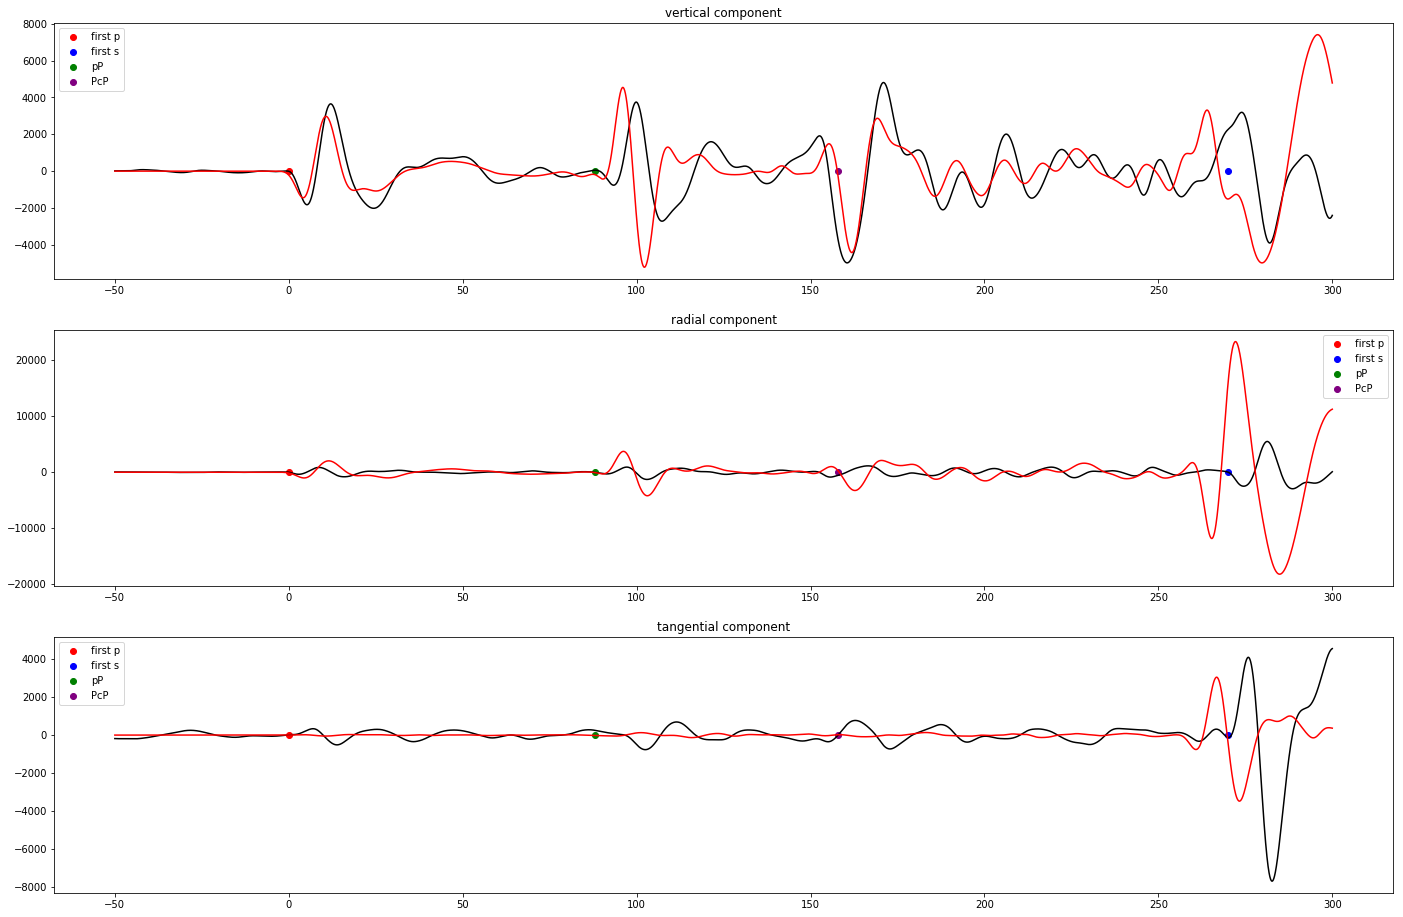

In [162]:
plot_single(station="DSD")

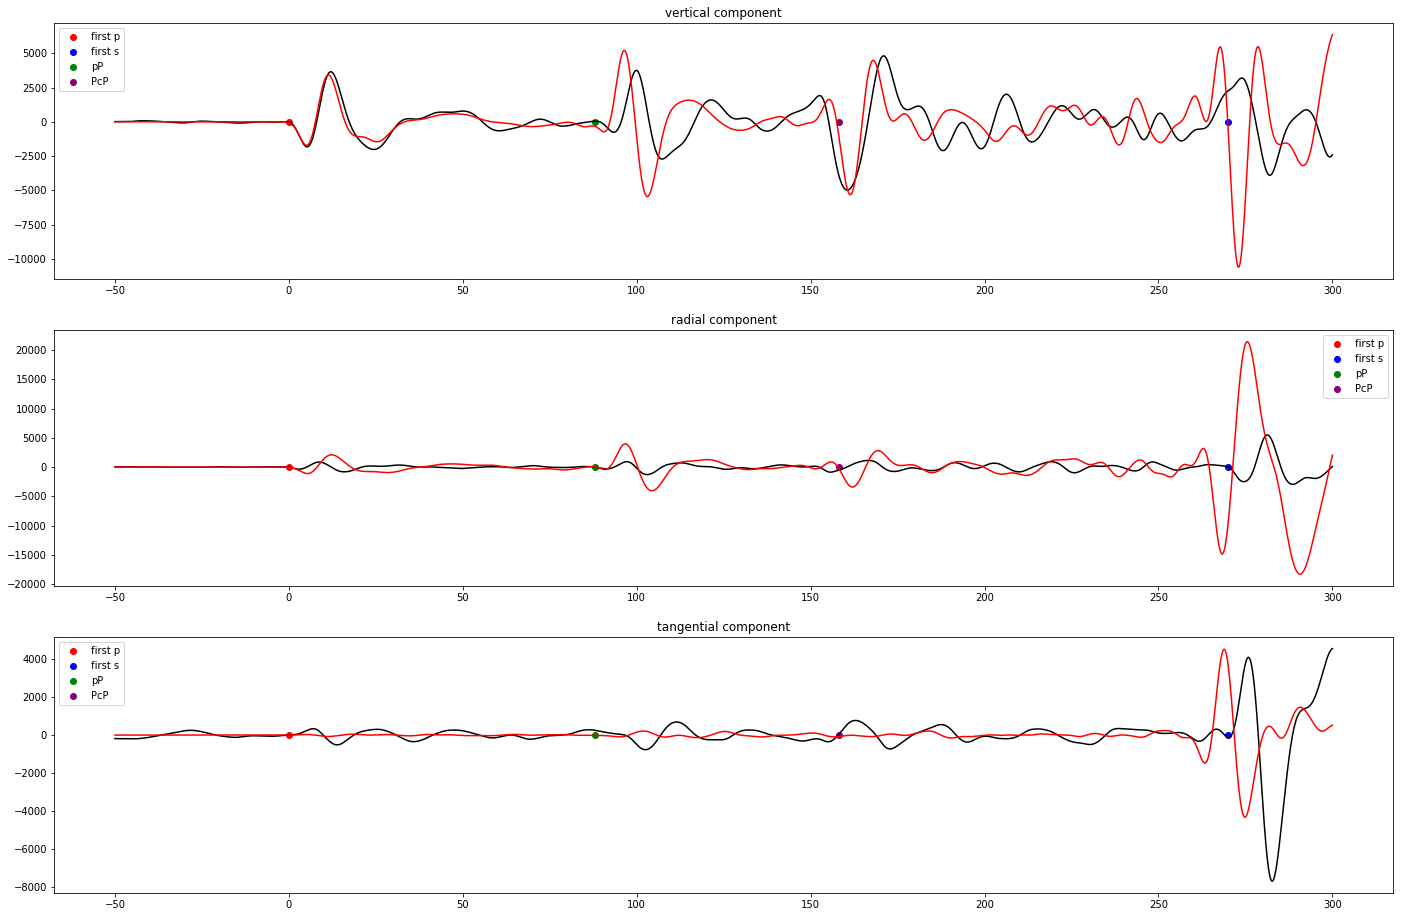

In [163]:
plot_single(dir2="/Users/ziyixi/data/20190211/bg-tao/OUTPUT_FILES",station="DSD")

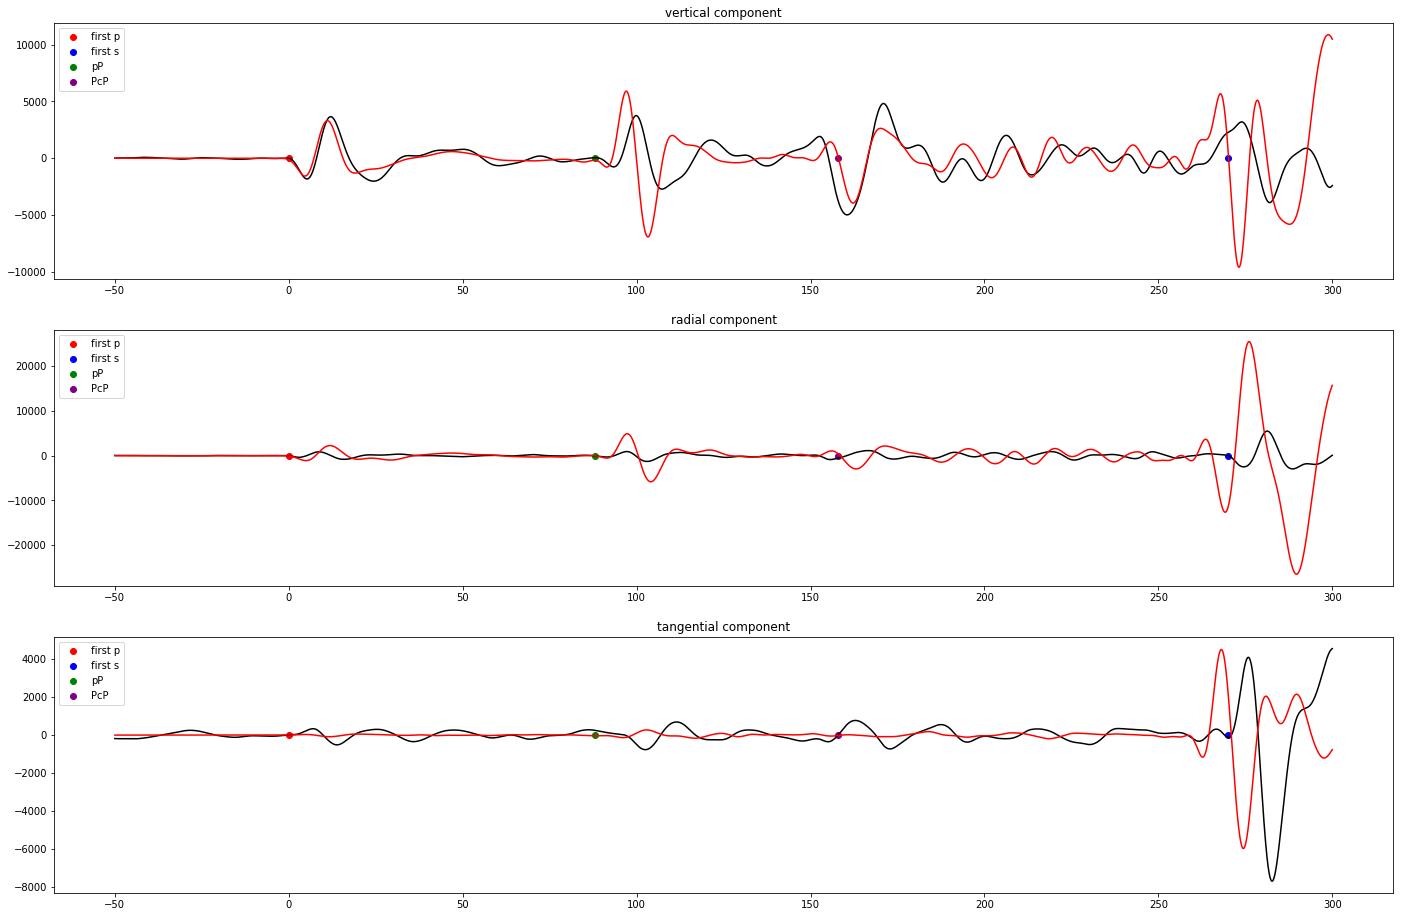

In [164]:
plot_single(dir2="/Users/ziyixi/data/20190211/bg-min/OUTPUT_FILES",station="DSD")

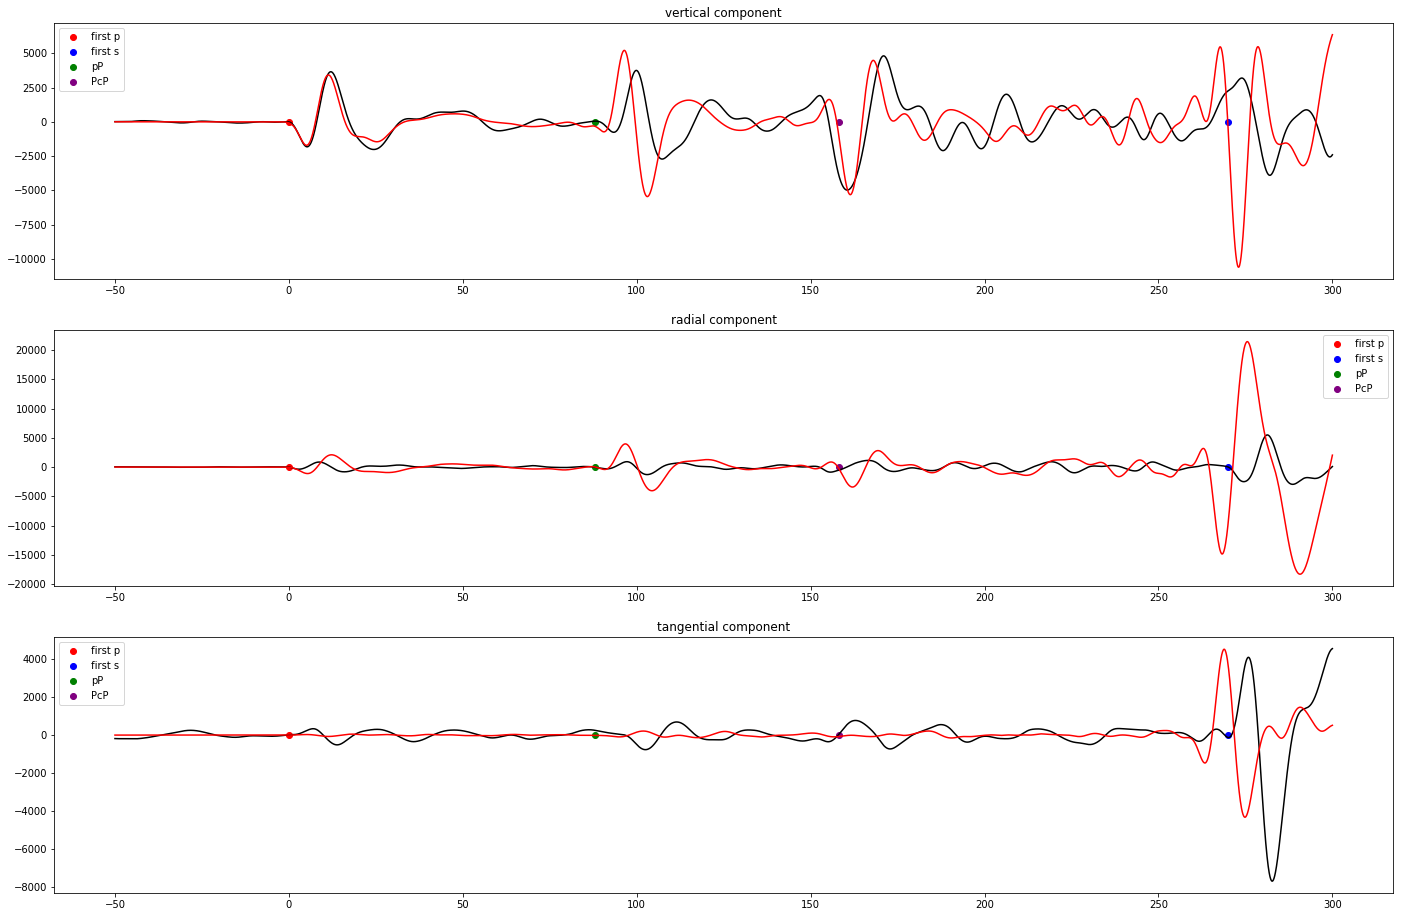

In [165]:
plot_single(dir2="/Users/ziyixi/data/20190211/bg-min-tao/OUTPUT_FILES",station="DSD")

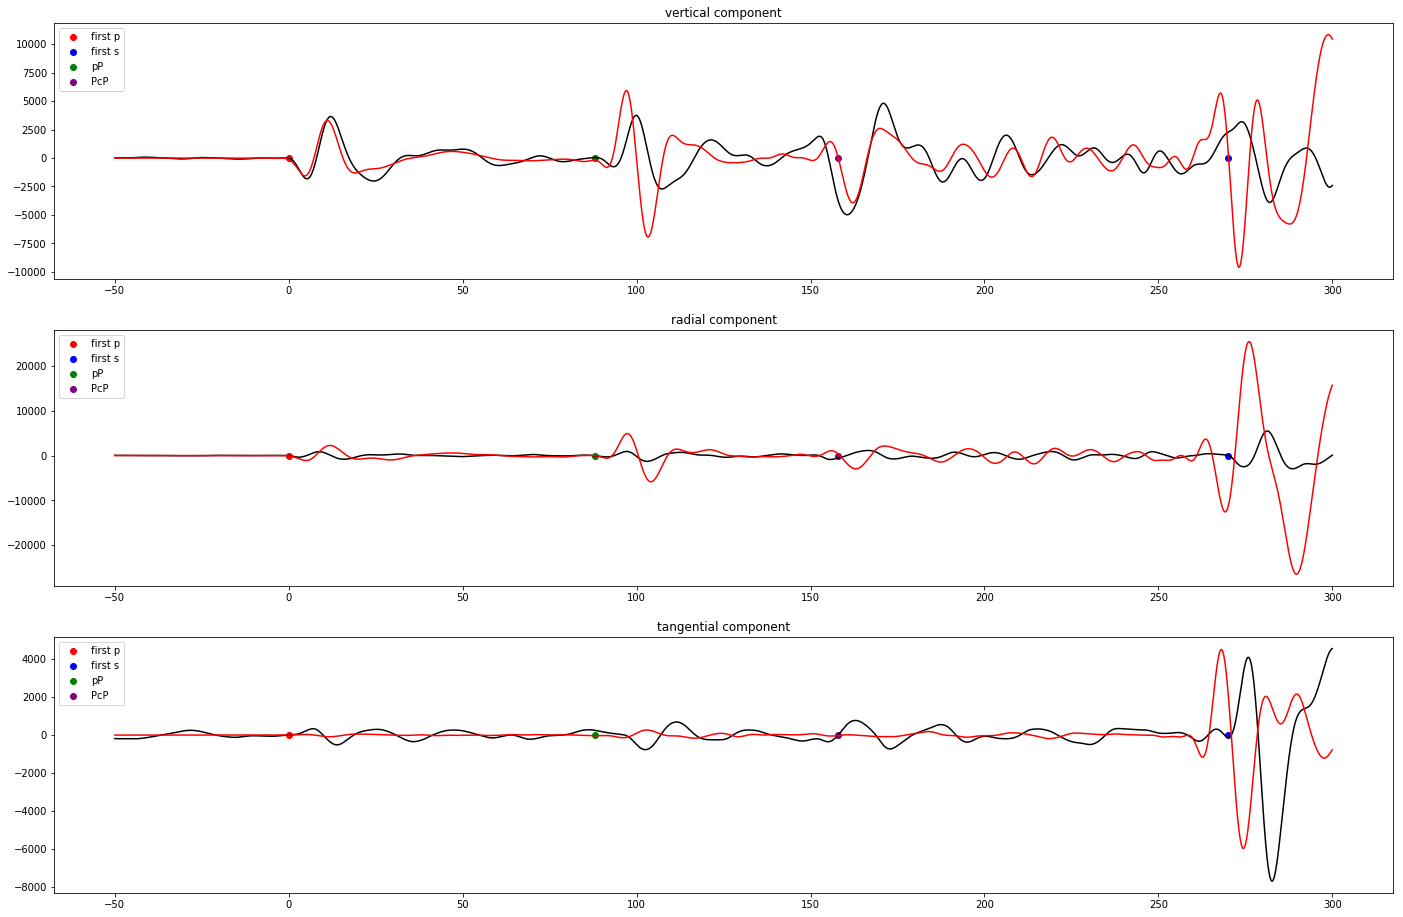

In [166]:
plot_single(dir2="/Users/ziyixi/data/20190211/bg-tao-min/OUTPUT_FILES",station="DSD")

In [169]:
def plot_single_s(station="ANQ",dir1="/Users/ziyixi/data/20190211/data/processed/201102101439302",dir2="/Users/ziyixi/data/20190211/bg/OUTPUT_FILES"):
    key1=set()
    key2=set()
    
    dir1_read_z=join(dir1,"SD."+station+"*Z")
    dir1_read_r=join(dir1,"SD."+station+"*R")
    dir1_read_t=join(dir1,"SD."+station+"*T")
    
    dir2_read_z=join(dir2,"SD."+station+".MXZ.sem.sac")
    dir2_read_r=join(dir2,"SD."+station+".MXR.sem.sac")
    dir2_read_t=join(dir2,"SD."+station+".MXT.sem.sac")
    
    z1=obspy.read(dir1_read_z)[0]
    r1=obspy.read(dir1_read_r)[0]
    t1=obspy.read(dir1_read_t)[0]
    
    z2=obspy.read(dir2_read_z)[0]
    r2=obspy.read(dir2_read_r)[0]
    t2=obspy.read(dir2_read_t)[0]
#     print(z1.stats,z2.stats)
    
    z1.filter("bandpass",freqmin=1/50,freqmax=1/10)
    r1.filter("bandpass",freqmin=1/50,freqmax=1/10)
    t1.filter("bandpass",freqmin=1/50,freqmax=1/10)
    z2.filter("bandpass",freqmin=1/50,freqmax=1/10)
    r2.filter("bandpass",freqmin=1/50,freqmax=1/10)
    t2.filter("bandpass",freqmin=1/50,freqmax=1/10)
    
#     z1=z1.slice(z1.stats.starttime+timedelta(seconds=float(z1.stats.sac.o)),z1.stats.endtime)
#     r1=r1.slice(r1.stats.starttime+timedelta(seconds=float(r1.stats.sac.o)),r1.stats.endtime)
#     t1=t1.slice(t1.stats.starttime+timedelta(seconds=float(t1.stats.sac.o)),t1.stats.endtime)
#     z2=z2.slice(z2.stats.starttime+timedelta(seconds=float(z2.stats.sac.o)),z2.stats.endtime)
#     r2=r2.slice(r2.stats.starttime+timedelta(seconds=float(r2.stats.sac.o)),r2.stats.endtime)
#     t2=t2.slice(t2.stats.starttime+timedelta(seconds=float(t2.stats.sac.o)),t2.stats.endtime)
    
    plot_arrivals={
            "first_p":None,
            "first_s":None,
            "pP":None,
            "PcP":None
    }    
    
    arrivals = model.get_travel_times(source_depth_in_km=z1.stats.sac.evdp,distance_in_degree=z1.stats.sac.gcarc)
    for arrival in arrivals:
        if((arrival.name=='p') or (arrival.name=="P")):
            plot_arrivals["first_p"]=arrival.time
            break

    for arrival in arrivals:
        if((arrival.name=='s') or (arrival.name=="S")):
            plot_arrivals["first_s"]=arrival.time
            break

    for arrival in arrivals:
        if((arrival.name=='pP')):
            plot_arrivals["pP"]=arrival.time
            break

    for arrival in arrivals:
        if((arrival.name=='PcP')):
            plot_arrivals["PcP"]=arrival.time
            break
    
    reftime1=z1.stats.starttime+timedelta(seconds=float(z1.stats.sac.o+z1.stats.sac.b))
    reftime2=z2.stats.starttime+timedelta(seconds=float(z2.stats.sac.o+z2.stats.sac.b))
#     print(reftime1,reftime2)
    
    T=120
    A=50
    z1=z1.slice(reftime1+timedelta(seconds=plot_arrivals["first_s"]-A),reftime1+timedelta(seconds=plot_arrivals["first_s"]+T))
    r1=r1.slice(reftime1+timedelta(seconds=plot_arrivals["first_s"]-A),reftime1+timedelta(seconds=plot_arrivals["first_s"]+T))
    t1=t1.slice(reftime1+timedelta(seconds=plot_arrivals["first_s"]-A),reftime1+timedelta(seconds=plot_arrivals["first_s"]+T))
    z2=z2.slice(reftime2+timedelta(seconds=plot_arrivals["first_s"]-A),reftime2+timedelta(seconds=plot_arrivals["first_s"]+T))
    r2=r2.slice(reftime2+timedelta(seconds=plot_arrivals["first_s"]-A),reftime2+timedelta(seconds=plot_arrivals["first_s"]+T))
    t2=t2.slice(reftime2+timedelta(seconds=plot_arrivals["first_s"]-A),reftime2+timedelta(seconds=plot_arrivals["first_s"]+T))
  
#     all=obspy.Stream()
#     all+=z1
#     all+=z2
#     all+=r1
#     all+=r2
#     all+=t1
#     all+=t2    
#     all.normalize(global_max=True)
    
#     z1.normalize()
#     r1.normalize()
#     t1.normalize()
#     z2.normalize()
#     r2.normalize()
#     t2.normalize()
    
    plt.figure(figsize=(24,16))
    plot_x_1=np.linspace(-A,T,z1.stats.npts)
    plot_x_2=np.linspace(-A,T,z2.stats.npts)
    
    axz=plt.subplot(311)
    plot_y_1=z1.data
    plot_y_2=z2.data*z2.stats.sac.scale
    axz.plot(plot_x_1,plot_y_1,"k")
    axz.plot(plot_x_2,plot_y_2,"r")
    axz.scatter(0,0,color="r",label="first s")
#     axz.scatter(plot_arrivals["first_s"]-plot_arrivals["first_p"],0,color="b",label="first s")
#     try:
#         axz.scatter(plot_arrivals["pP"]-plot_arrivals["first_p"],0,color="g",label="pP")
#         axz.scatter(plot_arrivals["PcP"]-plot_arrivals["first_p"],0,color="purple",label="PcP")
#     except:
#         pass
    axz.legend()
    axz.set_title("vertical component")
    
    axr=plt.subplot(312)
    plot_y_1=r1.data
    plot_y_2=r2.data*r2.stats.sac.scale
    axr.plot(plot_x_1,plot_y_1,"k")
    axr.plot(plot_x_2,plot_y_2,"r")
    axr.scatter(0,0,color="r",label="first s")
#     axr.scatter(plot_arrivals["first_s"]-plot_arrivals["first_p"],0,color="b",label="first s")
#     try:
#         axr.scatter(plot_arrivals["pP"]-plot_arrivals["first_p"],0,color="g",label="pP")
#         axr.scatter(plot_arrivals["PcP"]-plot_arrivals["first_p"],0,color="purple",label="PcP")
#     except:
#         pass
    axr.legend()
    axr.set_title("radial component")
    
    axt=plt.subplot(313)
    plot_y_1=t1.data
    plot_y_2=t2.data*t2.stats.sac.scale
    axt.plot(plot_x_1,plot_y_1,"k")
    axt.plot(plot_x_2,plot_y_2,"r")
    axt.scatter(0,0,color="r",label="first s")
#     axt.scatter(plot_arrivals["first_s"]-plot_arrivals["first_p"],0,color="b",label="first s")
#     try:
#         axt.scatter(plot_arrivals["pP"]-plot_arrivals["first_p"],0,color="g",label="pP")
#         axt.scatter(plot_arrivals["PcP"]-plot_arrivals["first_p"],0,color="purple",label="PcP")
#     except:
#         pass
    axt.legend()
    axt.set_title("tangential component")

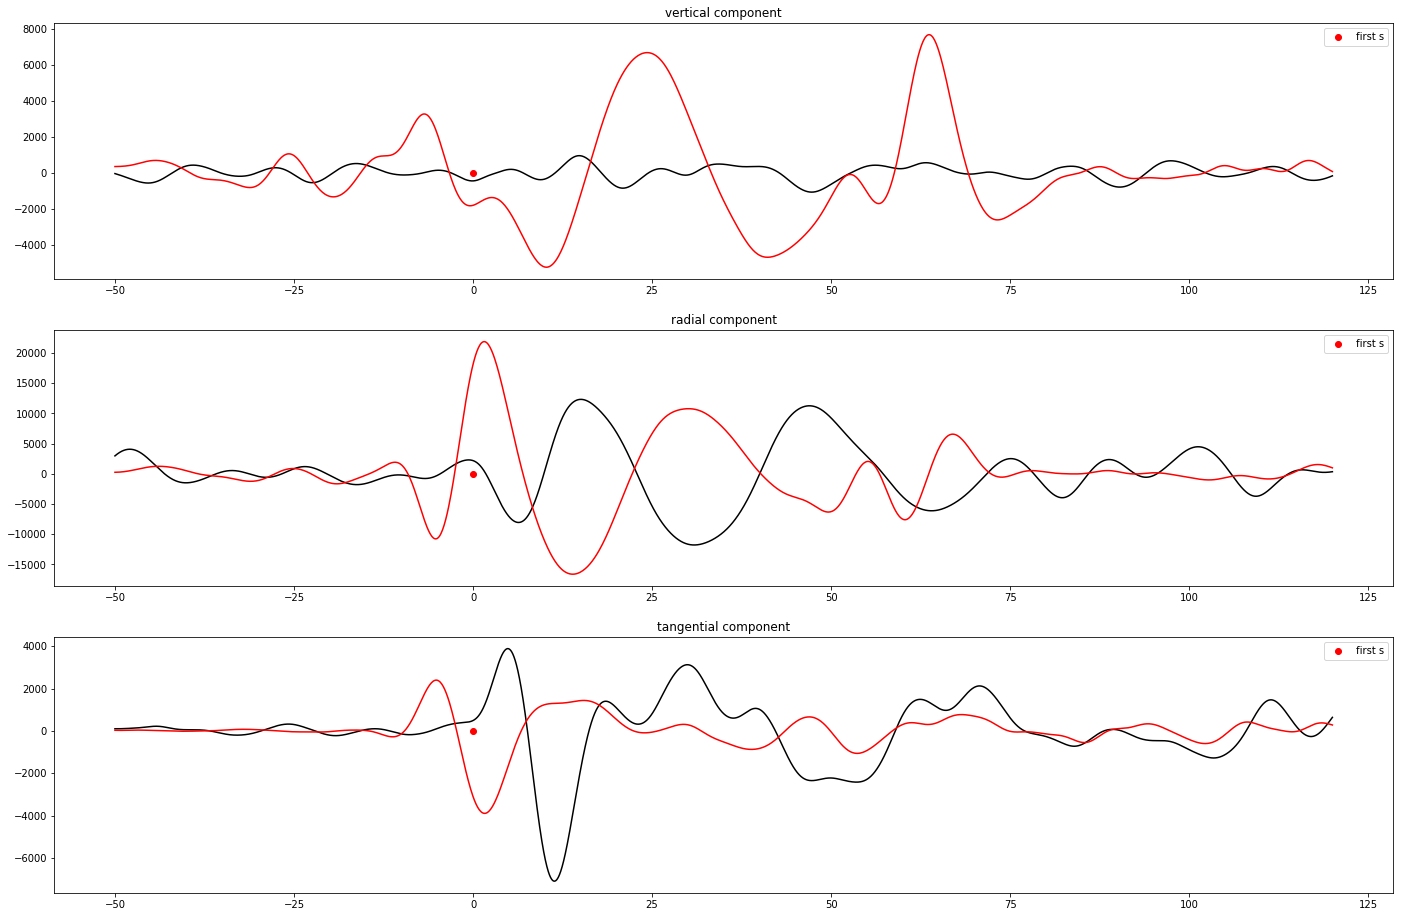

In [170]:
plot_single_s()

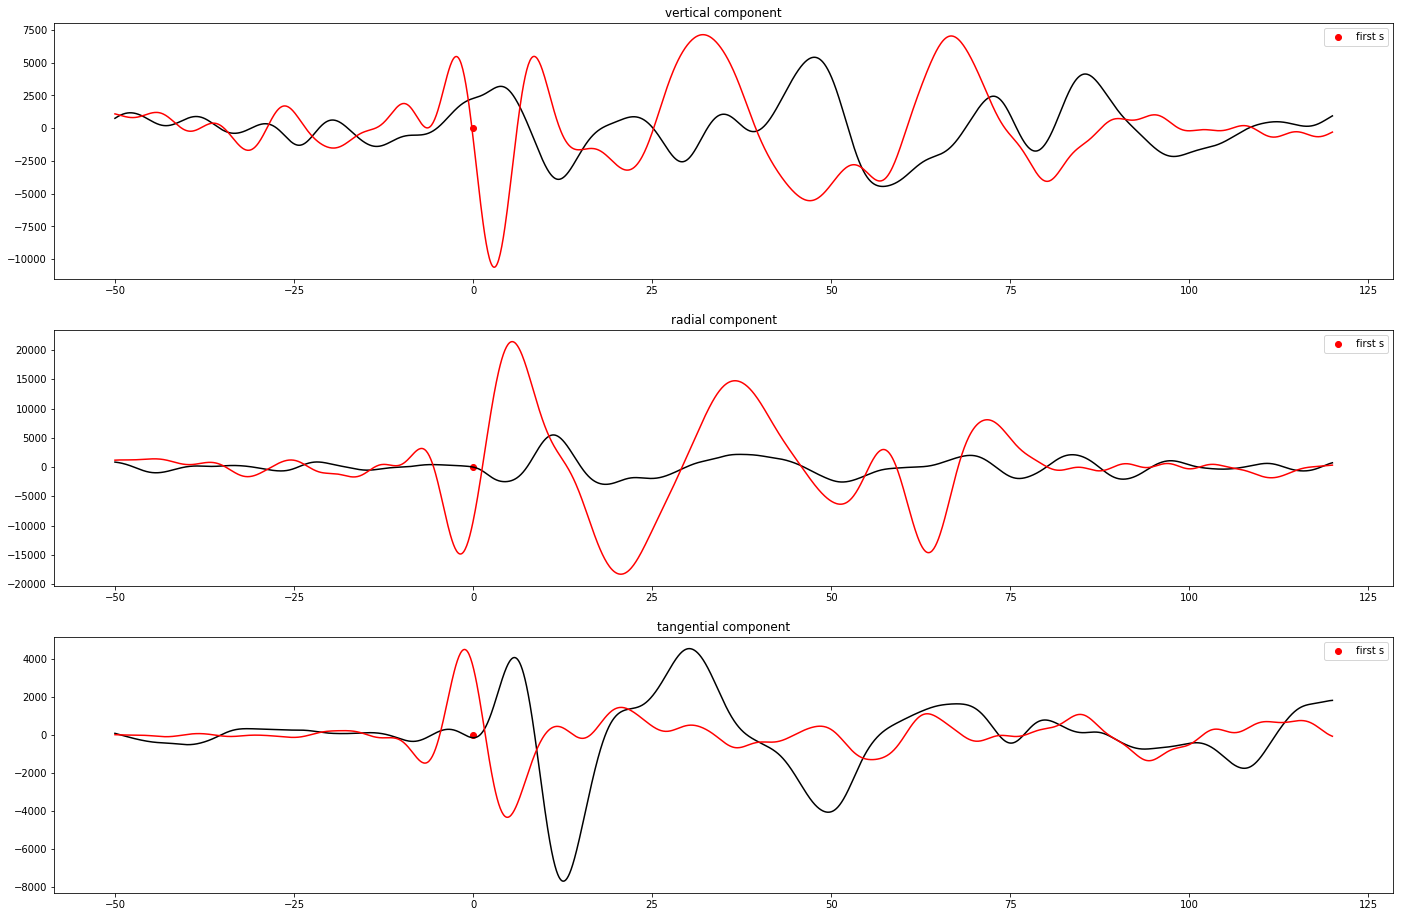

In [171]:
plot_single_s(dir2="/Users/ziyixi/data/20190211/bg-tao/OUTPUT_FILES",station="DSD")

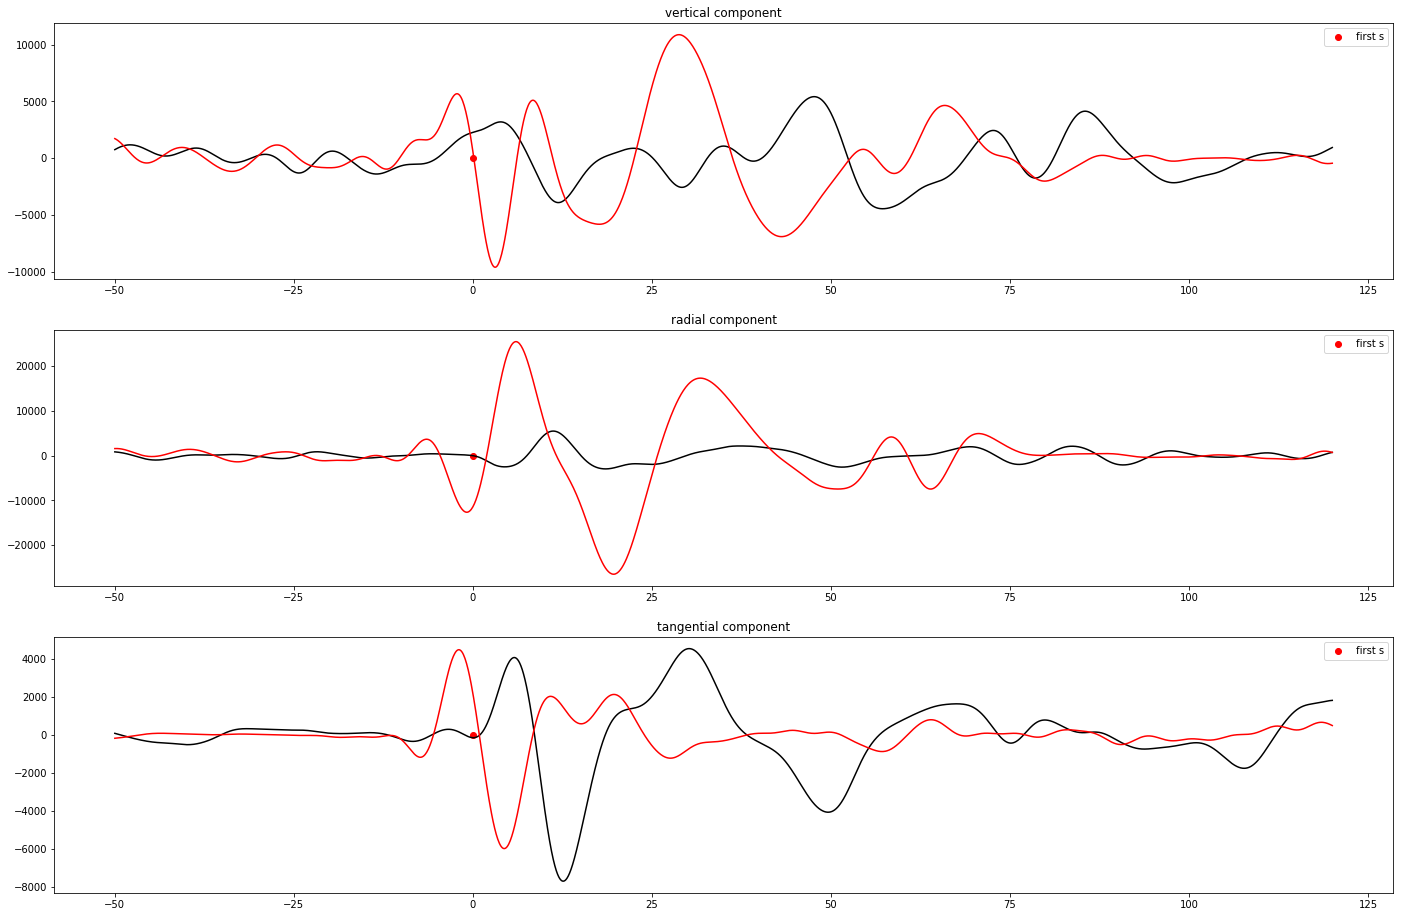

In [172]:
plot_single_s(dir2="/Users/ziyixi/data/20190211/bg-min/OUTPUT_FILES",station="DSD")

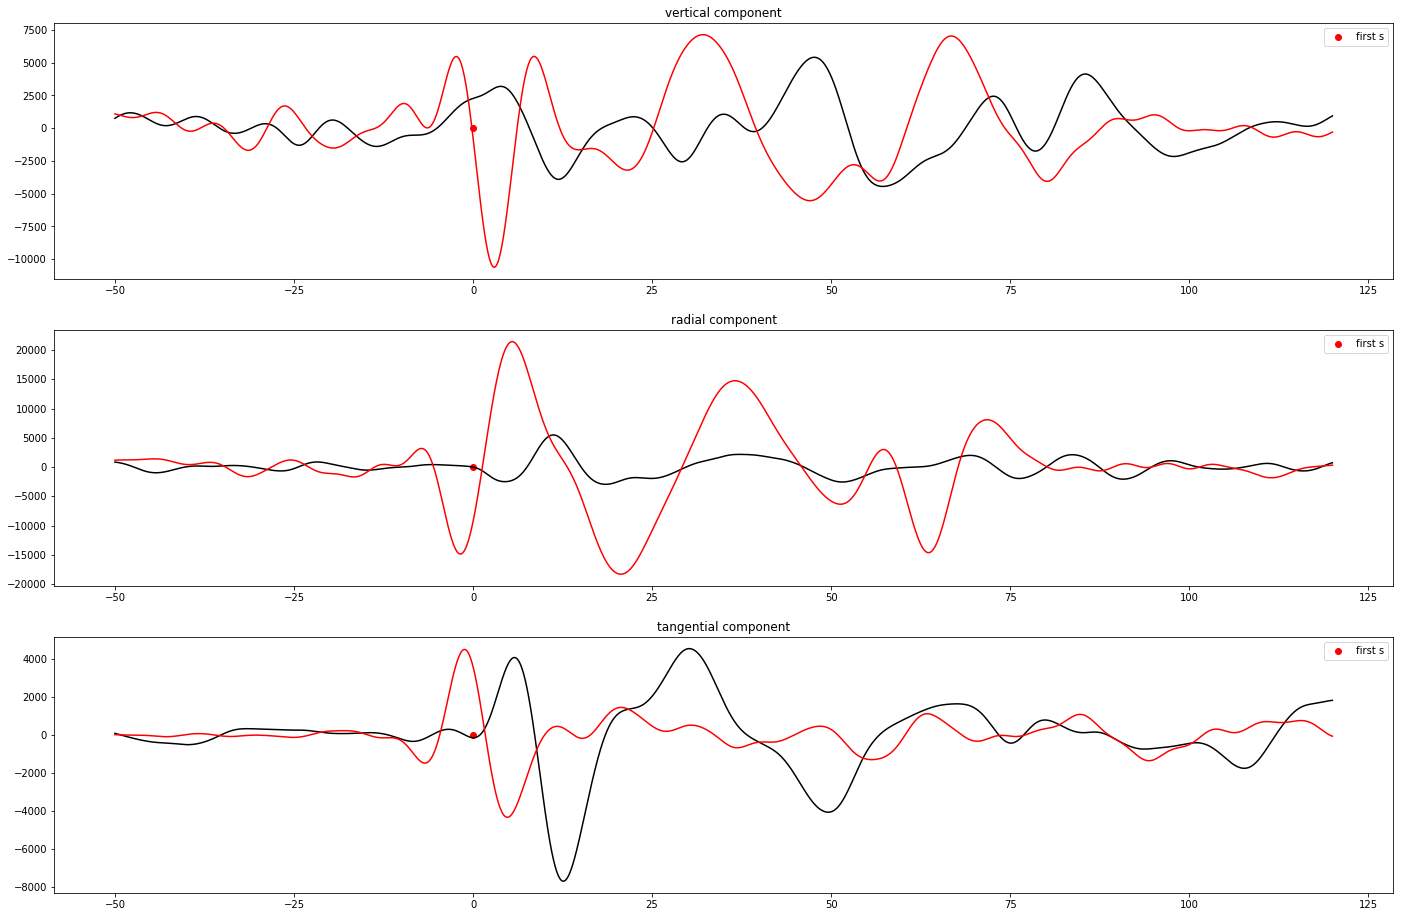

In [173]:
plot_single_s(dir2="/Users/ziyixi/data/20190211/bg-min-tao/OUTPUT_FILES",station="DSD")

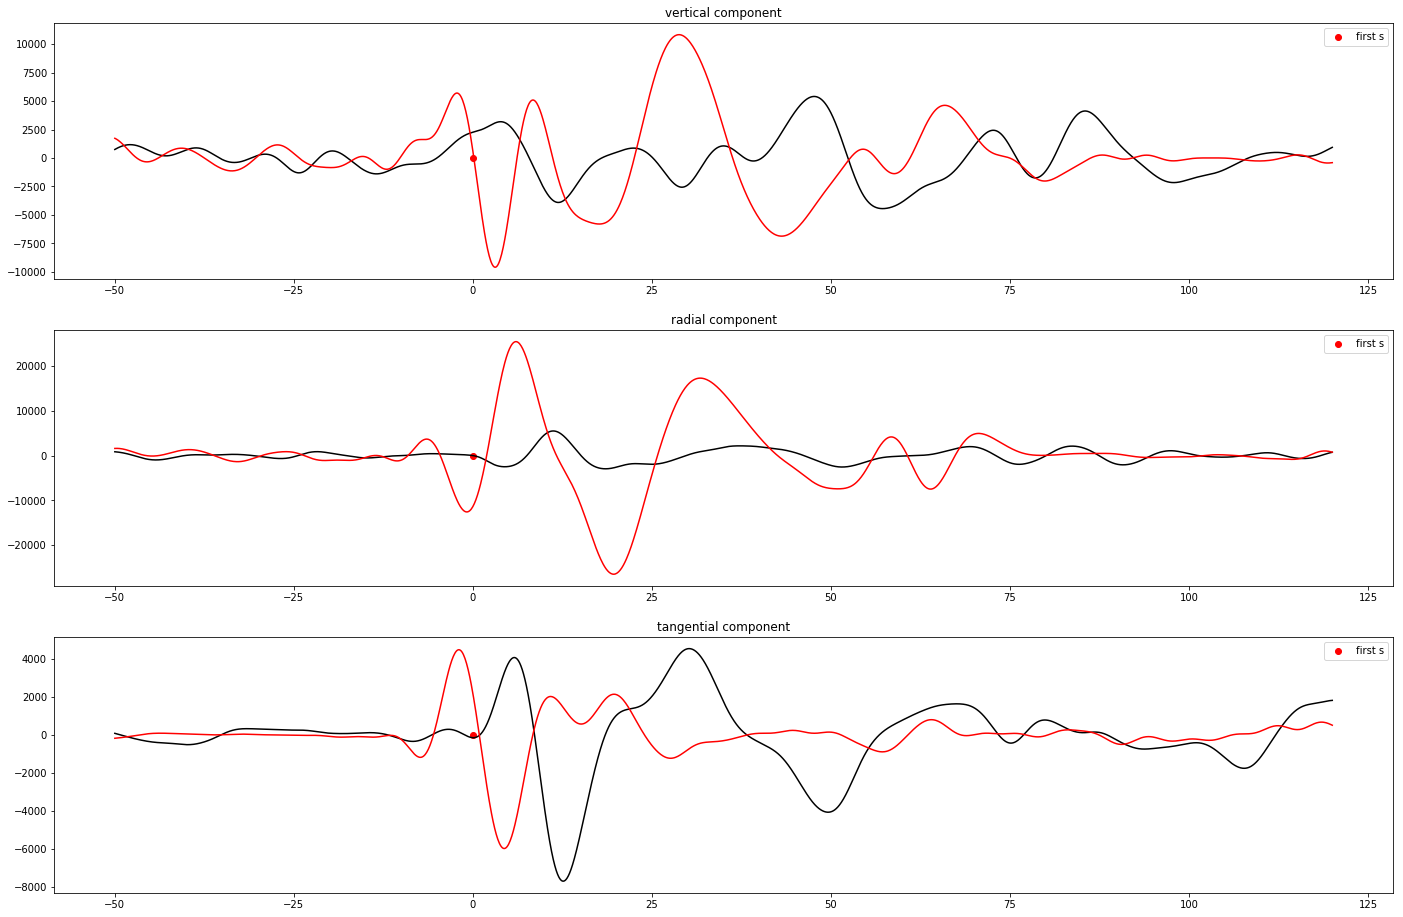

In [174]:
plot_single_s(dir2="/Users/ziyixi/data/20190211/bg-tao-min/OUTPUT_FILES",station="DSD")

In [175]:
def plot_single_l(station="ANQ",dir1="/Users/ziyixi/data/20190211/data/processed/201102101439302",dir2="/Users/ziyixi/data/20190211/bg/OUTPUT_FILES"):
    key1=set()
    key2=set()
    
    dir1_read_z=join(dir1,"SD."+station+"*Z")
    dir1_read_r=join(dir1,"SD."+station+"*R")
    dir1_read_t=join(dir1,"SD."+station+"*T")
    
    dir2_read_z=join(dir2,"SD."+station+".MXZ.sem.sac")
    dir2_read_r=join(dir2,"SD."+station+".MXR.sem.sac")
    dir2_read_t=join(dir2,"SD."+station+".MXT.sem.sac")
    
    z1=obspy.read(dir1_read_z)[0]
    r1=obspy.read(dir1_read_r)[0]
    t1=obspy.read(dir1_read_t)[0]
    
    z2=obspy.read(dir2_read_z)[0]
    r2=obspy.read(dir2_read_r)[0]
    t2=obspy.read(dir2_read_t)[0]
#     print(z1.stats,z2.stats)
    
    z1.filter("bandpass",freqmin=1/50,freqmax=1/10)
    r1.filter("bandpass",freqmin=1/50,freqmax=1/10)
    t1.filter("bandpass",freqmin=1/50,freqmax=1/10)
    z2.filter("bandpass",freqmin=1/50,freqmax=1/10)
    r2.filter("bandpass",freqmin=1/50,freqmax=1/10)
    t2.filter("bandpass",freqmin=1/50,freqmax=1/10)
    
#     z1=z1.slice(z1.stats.starttime+timedelta(seconds=float(z1.stats.sac.o)),z1.stats.endtime)
#     r1=r1.slice(r1.stats.starttime+timedelta(seconds=float(r1.stats.sac.o)),r1.stats.endtime)
#     t1=t1.slice(t1.stats.starttime+timedelta(seconds=float(t1.stats.sac.o)),t1.stats.endtime)
#     z2=z2.slice(z2.stats.starttime+timedelta(seconds=float(z2.stats.sac.o)),z2.stats.endtime)
#     r2=r2.slice(r2.stats.starttime+timedelta(seconds=float(r2.stats.sac.o)),r2.stats.endtime)
#     t2=t2.slice(t2.stats.starttime+timedelta(seconds=float(t2.stats.sac.o)),t2.stats.endtime)
    
    plot_arrivals={
            "first_p":None,
            "first_s":None,
            "pP":None,
            "PcP":None
    }    
    
    arrivals = model.get_travel_times(source_depth_in_km=z1.stats.sac.evdp,distance_in_degree=z1.stats.sac.gcarc)
    for arrival in arrivals:
        if((arrival.name=='p') or (arrival.name=="P")):
            plot_arrivals["first_p"]=arrival.time
            break

    for arrival in arrivals:
        if((arrival.name=='s') or (arrival.name=="S")):
            plot_arrivals["first_s"]=arrival.time
            break

    for arrival in arrivals:
        if((arrival.name=='pP')):
            plot_arrivals["pP"]=arrival.time
            break

    for arrival in arrivals:
        if((arrival.name=='PcP')):
            plot_arrivals["PcP"]=arrival.time
            break
    
    reftime1=z1.stats.starttime+timedelta(seconds=float(z1.stats.sac.o+z1.stats.sac.b))
    reftime2=z2.stats.starttime+timedelta(seconds=float(z2.stats.sac.o+z2.stats.sac.b))
#     print(reftime1,reftime2)
    
    T=600
    A=50
    z1=z1.slice(reftime1+timedelta(seconds=plot_arrivals["first_p"]-A),reftime1+timedelta(seconds=plot_arrivals["first_p"]+T))
    r1=r1.slice(reftime1+timedelta(seconds=plot_arrivals["first_p"]-A),reftime1+timedelta(seconds=plot_arrivals["first_p"]+T))
    t1=t1.slice(reftime1+timedelta(seconds=plot_arrivals["first_p"]-A),reftime1+timedelta(seconds=plot_arrivals["first_p"]+T))
    z2=z2.slice(reftime2+timedelta(seconds=plot_arrivals["first_p"]-A),reftime2+timedelta(seconds=plot_arrivals["first_p"]+T))
    r2=r2.slice(reftime2+timedelta(seconds=plot_arrivals["first_p"]-A),reftime2+timedelta(seconds=plot_arrivals["first_p"]+T))
    t2=t2.slice(reftime2+timedelta(seconds=plot_arrivals["first_p"]-A),reftime2+timedelta(seconds=plot_arrivals["first_p"]+T))
  
#     all=obspy.Stream()
#     all+=z1
#     all+=z2
#     all+=r1
#     all+=r2
#     all+=t1
#     all+=t2    
#     all.normalize(global_max=True)
    
#     z1.normalize()
#     r1.normalize()
#     t1.normalize()
#     z2.normalize()
#     r2.normalize()
#     t2.normalize()
    
    plt.figure(figsize=(24,16))
    plot_x_1=np.linspace(-A,T,z1.stats.npts)
    plot_x_2=np.linspace(-A,T,z2.stats.npts)
    
    axz=plt.subplot(311)
    plot_y_1=z1.data
    plot_y_2=z2.data*z2.stats.sac.scale
    axz.plot(plot_x_1,plot_y_1,"k")
    axz.plot(plot_x_2,plot_y_2,"r")
    axz.scatter(0,0,color="r",label="first p")
    axz.scatter(plot_arrivals["first_s"]-plot_arrivals["first_p"],0,color="b",label="first s")
    try:
        axz.scatter(plot_arrivals["pP"]-plot_arrivals["first_p"],0,color="g",label="pP")
        axz.scatter(plot_arrivals["PcP"]-plot_arrivals["first_p"],0,color="purple",label="PcP")
    except:
        pass
    axz.legend()
    axz.set_title("vertical component")
    
    axr=plt.subplot(312)
    plot_y_1=r1.data
    plot_y_2=r2.data*r2.stats.sac.scale
    axr.plot(plot_x_1,plot_y_1,"k")
    axr.plot(plot_x_2,plot_y_2,"r")
    axr.scatter(0,0,color="r",label="first p")
    axr.scatter(plot_arrivals["first_s"]-plot_arrivals["first_p"],0,color="b",label="first s")
    try:
        axr.scatter(plot_arrivals["pP"]-plot_arrivals["first_p"],0,color="g",label="pP")
        axr.scatter(plot_arrivals["PcP"]-plot_arrivals["first_p"],0,color="purple",label="PcP")
    except:
        pass
    axr.legend()
    axr.set_title("radial component")
    
    axt=plt.subplot(313)
    plot_y_1=t1.data
    plot_y_2=t2.data*t2.stats.sac.scale
    axt.plot(plot_x_1,plot_y_1,"k")
    axt.plot(plot_x_2,plot_y_2,"r")
    axt.scatter(0,0,color="r",label="first p")
    axt.scatter(plot_arrivals["first_s"]-plot_arrivals["first_p"],0,color="b",label="first s")
    try:
        axt.scatter(plot_arrivals["pP"]-plot_arrivals["first_p"],0,color="g",label="pP")
        axt.scatter(plot_arrivals["PcP"]-plot_arrivals["first_p"],0,color="purple",label="PcP")
    except:
        pass
    axt.legend()
    axt.set_title("tangential component")

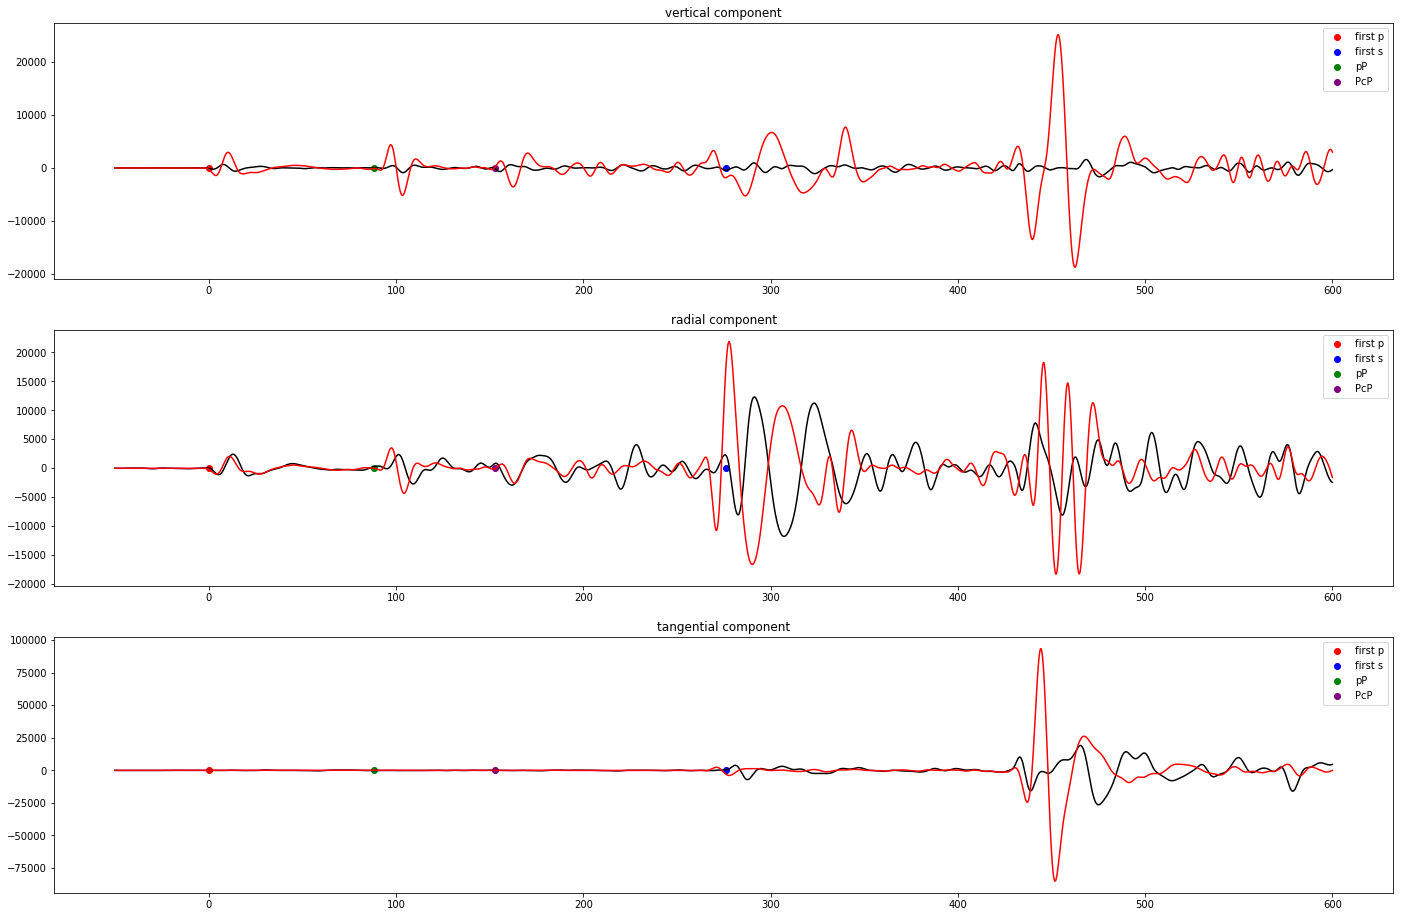

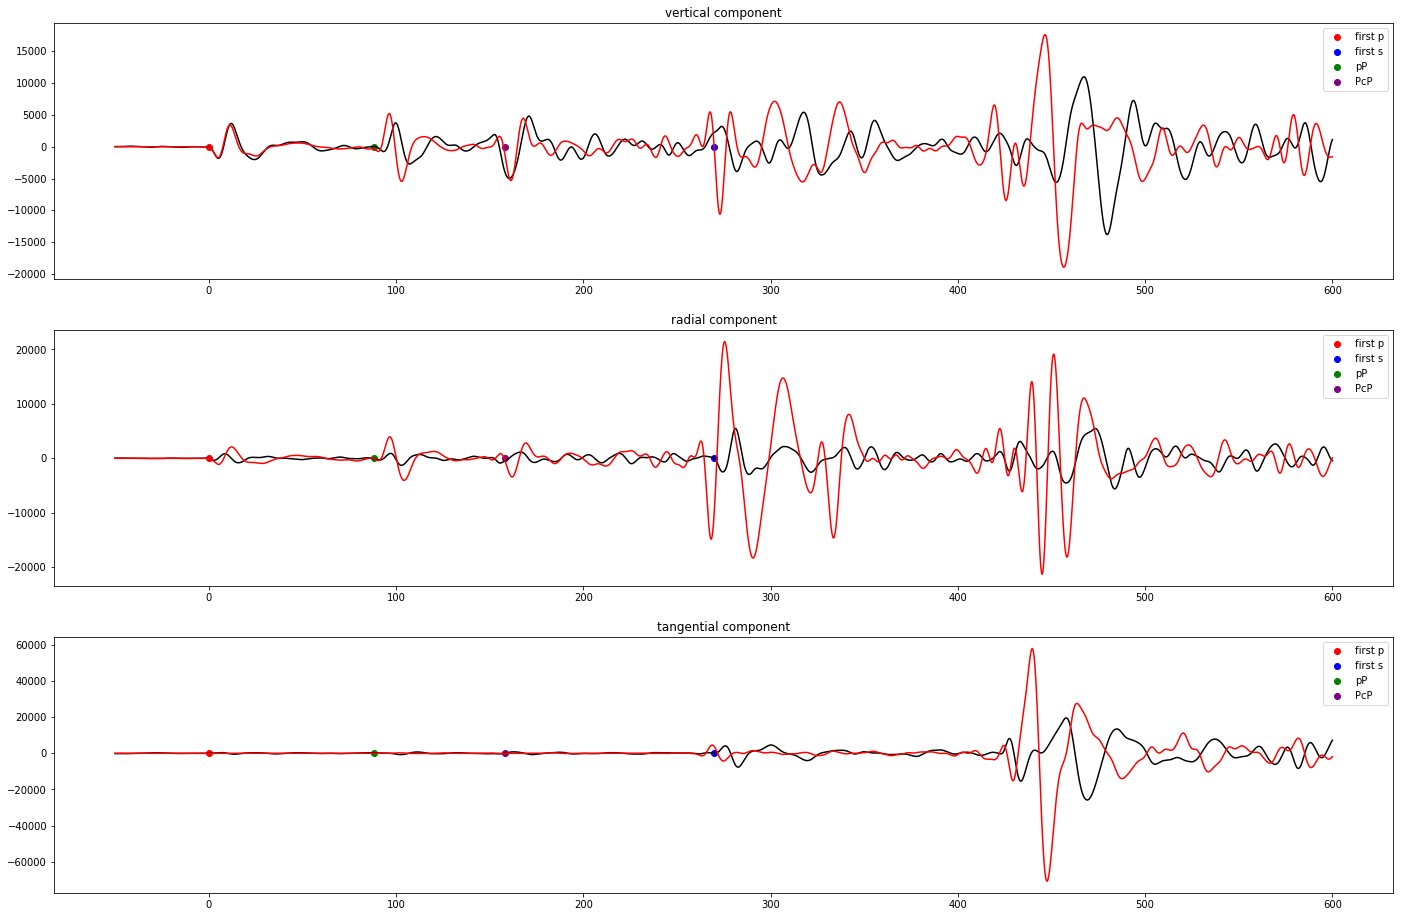

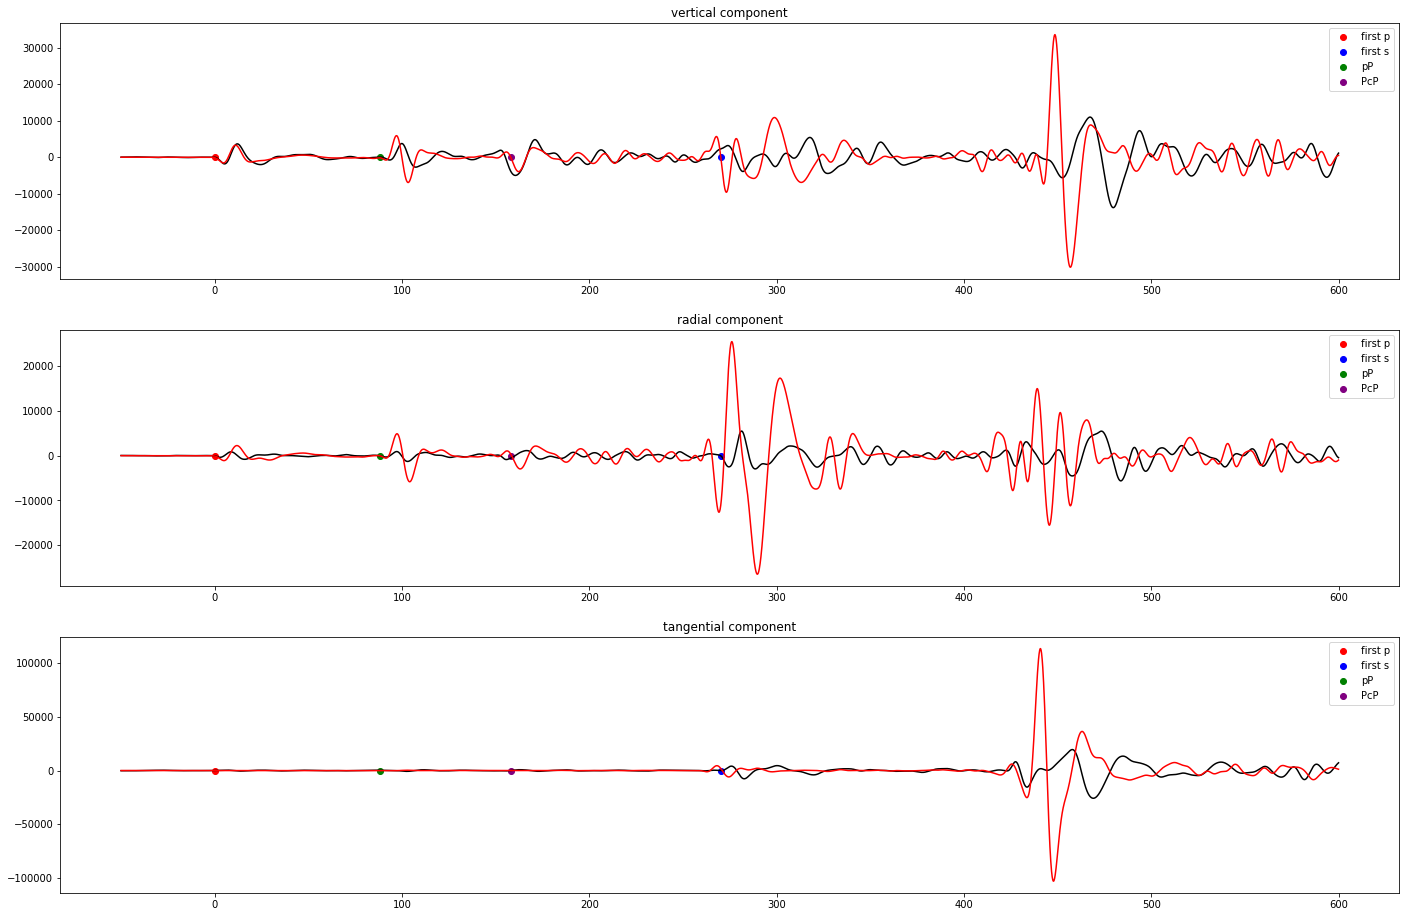

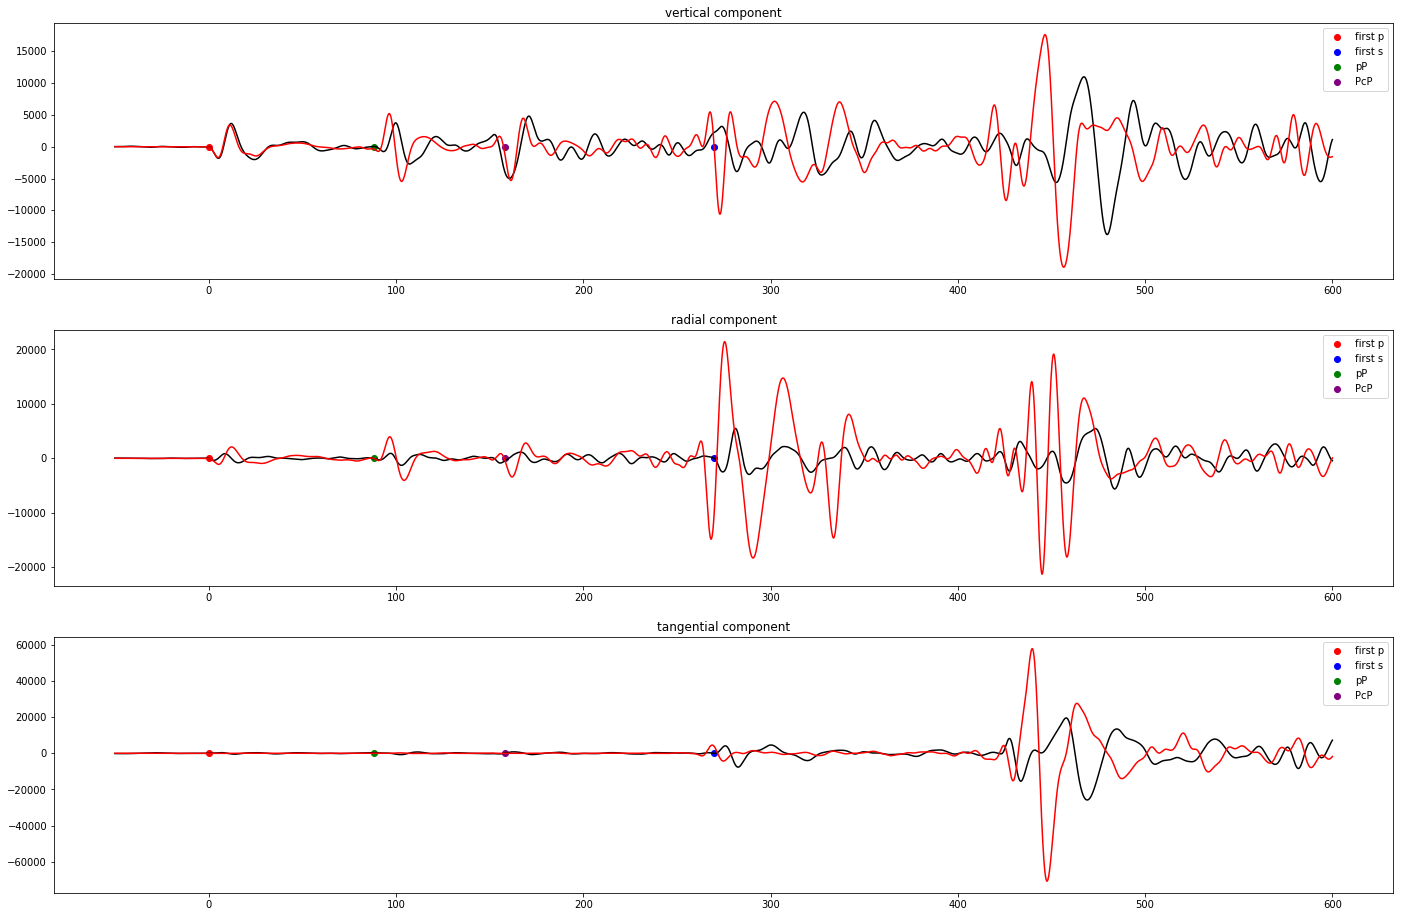

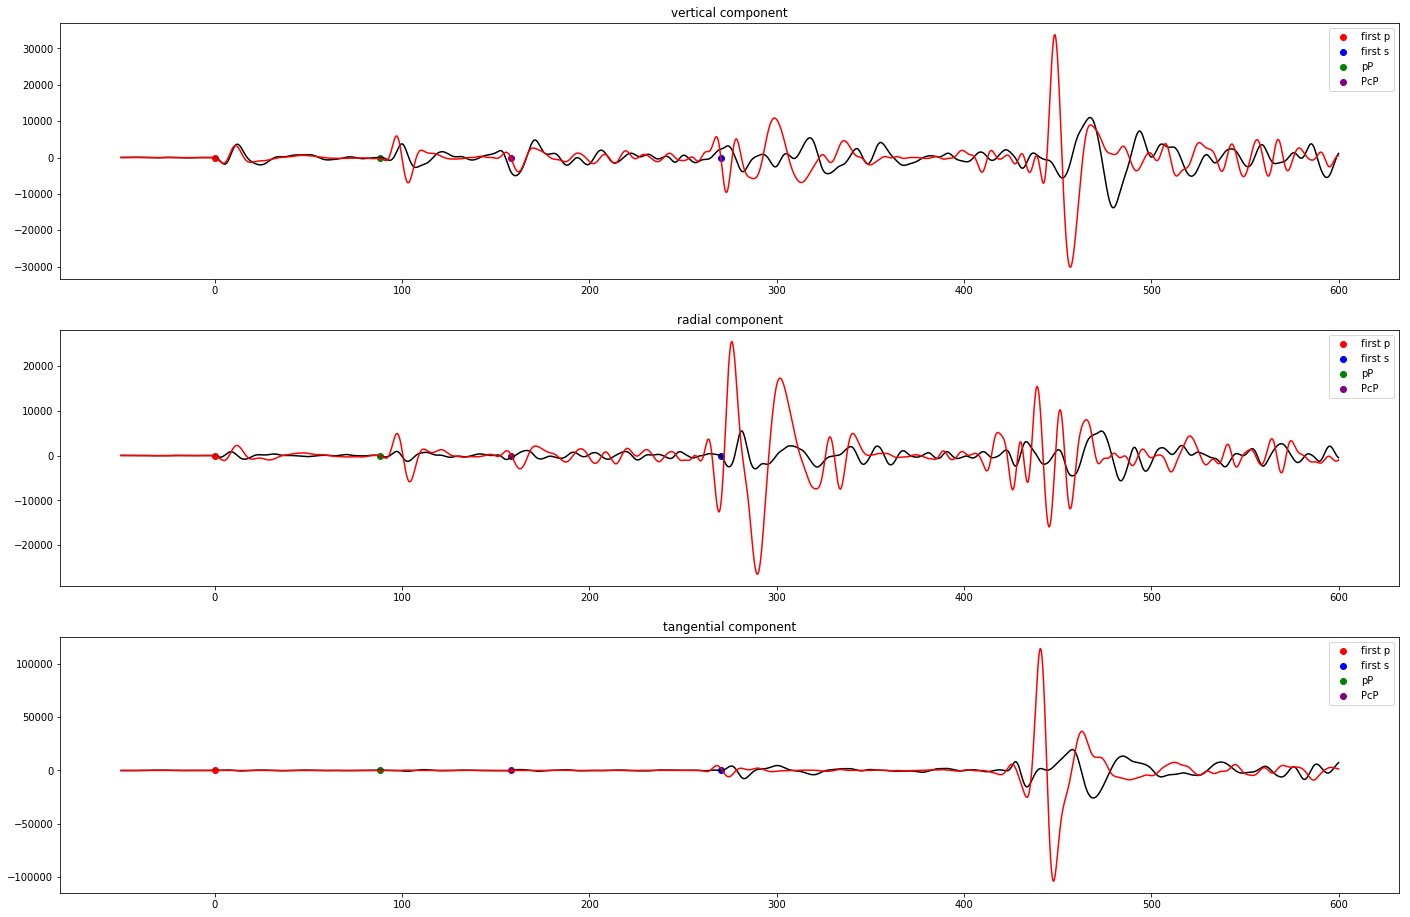

In [176]:
plot_single_l()
plot_single_l(dir2="/Users/ziyixi/data/20190211/bg-tao/OUTPUT_FILES",station="DSD")
plot_single_l(dir2="/Users/ziyixi/data/20190211/bg-min/OUTPUT_FILES",station="DSD")
plot_single_l(dir2="/Users/ziyixi/data/20190211/bg-min-tao/OUTPUT_FILES",station="DSD")
plot_single_l(dir2="/Users/ziyixi/data/20190211/bg-tao-min/OUTPUT_FILES",station="DSD")